#### terá como objetivo gerar novas imagens de forma a balancear a o dataset

In [31]:
import cv2

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import remove, listdir, system
from os.path import splitext, join, isfile

In [2]:

#apenas para teste
#imagePath = 'GTSRB_TP/train_images/00027/00001_00005.png'

#só para debug
#savePath = 'savaImgs/'

In [3]:
def blur(imagePath):  
    # bat.jpg is the batman image.
    img = cv2.imread(imagePath) 
    
    #cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_blur.' +tipo
    path.append(nome)
    path = '/'.join(path)

    # make sure that you have saved it in the same folder
    # You can change the kernel size as you want
    blurImg = cv2.blur(img,(10,10)) 
    #cv2.imshow(nome,blurImg)
    #cv2.imwrite(savePath+nome,blurImg)
    
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)
#blur(imagePath)

In [4]:

def brightness(imagePath):

    #print('path: ' + imagePath)

    img = cv2.imread(imagePath)

    #cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_bright.' +tipo
    path.append(nome)
    path = '/'.join(path)


    value = random.uniform(0.1,2)
    #print(value)

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#brightness(imagePath)

In [5]:
def contrast(imagePath):
    img = cv2.imread(imagePath)

    #print('path: ' + imagePath)
 
    #cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_contrast.' +tipo
    path.append(nome)
    path = '/'.join(path)


    value = random.uniform(0.4, 1.1)
    #print(value)
    #value=1.5
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv = hsv*value
    hsv[hsv>255]  = 255
    hsv = hsv*value 
    hsv[hsv>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    # cv2.imshow('Result', img)
    # #cv2.imwrite(savePath+nome,img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#contrast(imagePath)

In [6]:

def zoom(imagePath):
    
    img = cv2.imread(imagePath)

    #cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_zoom.' +tipo
    path.append(nome)
    path = '/'.join(path)

    
    value = random.uniform(0.6, 1)
    #print(value)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]

    #restabelecer dimenções
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)

    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#zoom(imagePath)

In [7]:

def vertical_shift(imagePath):

    img = cv2.imread(imagePath)
    
    #cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_VertShift.' +tipo
    path.append(nome)
    path = '/'.join(path)

    ratio = random.uniform(-0.5, 0.5)
    #print(ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]

    #restabelecer dimenções
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    
    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#vertical_shift(imagePath)


In [8]:
def horizontal_shift(imagePath):

    img = cv2.imread(imagePath)
    
    #cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_HoriShift.' +tipo
    path.append(nome)
    path = '/'.join(path)

    ratio = random.uniform(-0.5, 0.5)
    #print(ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    #restabelecer dimenções
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    
    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#horizontal_shift(imagePath)

In [9]:
def rotationRand(imagePath):

    img = cv2.imread(imagePath)

    #cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_rotRand.' + tipo
    path.append(nome)
    path = '/'.join(path)

    angle = int(random.uniform(-30, 30))
    #print(angle)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))

    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#rotationRand(imagePath)

In [10]:
def rotation(imagePath, angle, removeOriginal=False):

    img = cv2.imread(imagePath)


    cv2.imshow('oringinal',img)
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_rot.' +tipo
    path.append(nome)
    path = '/'.join(path)
    
    h, w, dim = img.shape
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    

    cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    cv2.imwrite(path,img)
    if removeOriginal:
        system('rm '+imagePath)

#rotation(imagePath, 10)

In [11]:
def flip(imagePath, direction=1):
    #direction=0 #to flip vertical
    img = cv2.imread(imagePath)


    #cv2.imshow('oringinal',img)
    
    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_fliped.' +tipo
    path.append(nome)
    path = '/'.join(path)
    
    img =cv2.flip(img, direction)

    # cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    cv2.imwrite(path,img)



In [12]:
def shear(imagePath):

    # read the input image
    img = cv2.imread(imagePath)
    #cv2.imshow('oringinal',img)

    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_shear.' +tipo
    path.append(nome)
    path = '/'.join(path)
    
    
    # get the image shape
    rows, cols, dim = img.shape
    # transformation matrix for Shearing
    # shearing applied to x-axis
    randomShearHori = random.uniform(-0.6, 0.6)
    randomShearVert = random.uniform(-0.6, 0.6)
    #print(randomShearHori)
    #print(randomShearVert)
    M = np.float32([[1, randomShearHori, 0],
                    [randomShearVert, 1  , 0],
                    [0, 0  , 1]])
             
    img = cv2.warpPerspective(img,M,(int(cols),int(rows)))


    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#shear(imagePath)

In [13]:

def centerShear(imagePath):

    img = cv2.imread(imagePath)
    #cv2.imshow('oringinal',img)

    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_shear.' +tipo
    path.append(nome)
    path = '/'.join(path)
    

    H, W, dim = img.shape

    randomShearHori = random.uniform(-0.6, 0.6)
    randomShearVert = random.uniform(-0.6, 0.6)

    M2 = np.float32([[1, randomShearHori, 0], [randomShearVert, 1, 0]])

    M2[0,2] = -M2[0,1] * W/2
    M2[1,2] = -M2[1,0] * H/2
    img = cv2.warpAffine(img, M2, (W, H))

    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#centerShear(imagePath)

In [14]:
def translation(imagePath):

    # read the input image
    img = cv2.imread(imagePath)
    #cv2.imshow('oringinal',img)

    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_translat.' +tipo
    path.append(nome)
    path = '/'.join(path)
    
    
    # get the image shape
    rows, cols, dim = img.shape
    # transformation matrix for Shearing
    # shearing applied to x-axis
    randomTransHori = random.randint(-int(rows/3),int(rows/3)) #random.uniform(-0.7, 0.7)
    randomTransVert = random.randint(-int(cols/3),int(cols/3)) #random.uniform(-0.7, 0.7)
    #print(randomTransHori)
    #print(randomTransVert)
    M = np.float32([[1, 0, randomTransHori],
                    [0, 1  , randomTransVert],
                    [0, 0  , 1]])
             
    img = cv2.warpPerspective(img,M,(int(cols),int(rows)))


    #cv2.imshow('Result', img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    cv2.imwrite(path,img)

#translation(imagePath)

In [15]:
def box(imagePath):    
    #print('entra box')
    # read the input image
    img = cv2.imread(imagePath)
    #cv2.imshow('oringinal',img)

    path = imagePath.split('/')
    nome = path.pop()
    nome, tipo = nome.split('.')
    nome = nome + '_box.' +tipo
    path.append(nome)
    path = '/'.join(path)

    rows, cols, dim = img.shape
    #print(rows, cols)

    ref_point = []

    x = random.randint(-10,rows+10) 
    y=-11
    #print(x)
    while y<x:
        y = random.randint(-10,rows+10)
        #print(y)

    ref_point.append((x ,y))
    #print('primeiro')
    #print(ref_point[0])
    ref_point.append((-11,-11))
    
    if x > rows-5 or y > rows-5:
        ref_point[1] = (rows-5, rows-5)
        while ref_point[0][0]<=ref_point[1][0] and ref_point[0][1]<=ref_point[1][1]: #or ref_point[0][0]+ref_point[1][0]>rows/2 : #or ref_point[0][1]+ref_point[1][1]>cols/5:
            ##print("no fundo")
            ref_point[1] = (random.randint(x,rows+10) ,random.randint(y,rows+10))
            ##print(ref_point[1])
    else:
        while ref_point[0][0]>=ref_point[1][0] or ref_point[0][1]>=ref_point[1][1]: #or ref_point[0][0]+ref_point[1][0]>rows/2 : #or ref_point[0][1]+ref_point[1][1]>cols/5:
            #print("no topo")
            ref_point[1] = (random.randint(x,rows+10) ,random.randint(y,rows+10))
            #print(ref_point[1])

    #print("sai do while")
    cv2.rectangle(img, ref_point[0], ref_point[1], (0, 0, 0), thickness=-1)
    #cv2.imshow("image", img)
    #cv2.imwrite(savePath+nome,img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    cv2.imwrite(path,img)

#box(imagePath)

In [16]:
#classes que podem sofrer flip para gerar novas images
#vai "flipar" das imagens de cada umas das classes e vai coloca-las na classe correta
def flipClasses(classes,class1, class2):
    classPath = join(newDatasetDestinaton,classes[class1])
    #print(tempPath)
    system('mkdir ' + newDatasetDestinaton + 'temp')
    system('cp ' + classPath +'/* ' + newDatasetDestinaton +'temp')
  
    for images in listdir(newDatasetDestinaton +'temp'):
        if '.png' not in images:
            continue
        else:
            pathimag = join(newDatasetDestinaton +'temp',images)
            flip(pathimag)
            system('rm ' + pathimag)


    classPath1 = join(newDatasetDestinaton,classes[class2])
    system('mkdir ' + newDatasetDestinaton + 'temp1')
    system('cp ' + classPath1 +'/* ' + newDatasetDestinaton +'temp1')

    for images in listdir(newDatasetDestinaton +'temp1'):
        if '.png' not in images:
            continue
        else:
            pathimag = join(newDatasetDestinaton +'temp1',images)
            flip(pathimag)
            system('rm ' + pathimag)

    system('cp '+newDatasetDestinaton + 'temp/* ' + classPath1)
    system('cp '+newDatasetDestinaton + 'temp1/* ' + classPath)
    system('rm -r '+newDatasetDestinaton + 'temp/')
    system('rm -r '+newDatasetDestinaton + 'temp1/')


#### Distribuição das classes

In [17]:
originalDatasetPath = 'GTSRB_TP/train_images/'
newDatasetDestinaton = 'GTSRB_TP/train_images_balanced/'

In [29]:
#copiar imagens do dataset original para o novo
system('cp -r ' + originalDatasetPath + ' ' + newDatasetDestinaton)
#não correr duas vezes! irá copiar o dataset original para dentro do destination 

0

In [26]:
#para ver maior e menor classes e a média
lista = []
classes = []
listaClasses = listdir(newDatasetDestinaton)
listaClasses.sort()

for classFolder in listaClasses:
        classes.append(classFolder)
        lista.append(len(listdir(join(newDatasetDestinaton,classFolder))))

print(max(lista))
print(min(lista))

print(sum(lista)/len(lista))


43

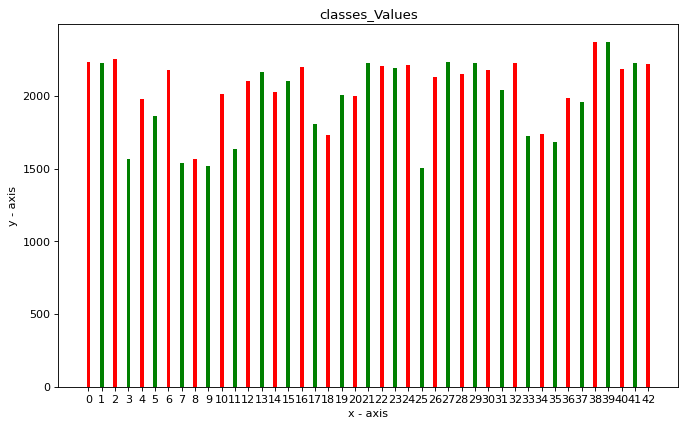

In [35]:
# x-coordinates of left sides of bars 
left = []
label = [] #os nomes dos ficheiros são muito longos por isso vamos usar numeração referente à classe
for i in range(len(lista)):
        left.append(i*150)
        label.append(i)
#left = [300, 600, 900, 1200, 1500, 1800, 2100, 2400]
  
# heights of bars
height = [10, 24, 36, 40, 5]
  
# labels for bars
tick_label = ['one', 'two', 'three', 'four', 'five']



figure(figsize=(10, 6), dpi=80)
# plotting a bar chart
plt.bar(left, lista, tick_label = label,
        width = 43, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('classes_Values')
  
# function to show the plot
plt.show()

## Data generation

In [31]:
flipClasses(classes,19,20)
flipClasses(classes,33,34)
flipClasses(classes,36,37)
flipClasses(classes,38,39)

In [32]:
for classIndex in classes:
    todo = 1500-len(listdir(join(newDatasetDestinaton,classIndex)))
    if todo>0:
        print(classIndex + "  -->  size:" + str(len(listdir(join(newDatasetDestinaton,classIndex)))) + ' --> todo:' + str(todo))

00000  -->  size:222 --> todo:1278
00003  -->  size:1411 --> todo:89
00006  -->  size:421 --> todo:1079
00007  -->  size:1441 --> todo:59
00008  -->  size:1411 --> todo:89
00009  -->  size:1471 --> todo:29
00011  -->  size:1321 --> todo:179
00014  -->  size:781 --> todo:719
00015  -->  size:631 --> todo:869
00016  -->  size:421 --> todo:1079
00017  -->  size:1111 --> todo:389
00018  -->  size:1201 --> todo:299
00019  -->  size:572 --> todo:928
00020  -->  size:572 --> todo:928
00021  -->  size:331 --> todo:1169
00022  -->  size:391 --> todo:1109
00023  -->  size:511 --> todo:989
00024  -->  size:271 --> todo:1229
00026  -->  size:601 --> todo:899
00027  -->  size:241 --> todo:1259
00028  -->  size:541 --> todo:959
00029  -->  size:271 --> todo:1229
00030  -->  size:451 --> todo:1049
00031  -->  size:781 --> todo:719
00032  -->  size:241 --> todo:1259
00033  -->  size:1111 --> todo:389
00034  -->  size:1111 --> todo:389
00035  -->  size:1201 --> todo:299
00036  -->  size:602 --> todo:89

In [33]:
for classIndex in range(len(classes)):
    todo = 1500-len(listdir(join(newDatasetDestinaton,classes[classIndex])))
    pathClass = join(newDatasetDestinaton,classes[classIndex])
    if todo>0:
        print(classes[classIndex] + "  -->  " + str(todo))
        
        nImages = int(todo/6)  #número de imagens a produzir por função de transformação
        
        #brightness
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            brightness(join(pathClass,imag))

        #contrast   
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            print(imag)
            contrast(join(pathClass,imag))
        
        #blur
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            blur(join(pathClass,imag))
        
        #zoom
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            zoom(join(pathClass,imag))
        
        #shearcenter
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            centerShear(join(pathClass,imag))

        #shear
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            shear(join(pathClass,imag))

        #translation
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            translation(join(pathClass,imag))
        
         #shift horizontal
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            horizontal_shift(join(pathClass,imag))

        #shift vertical
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            vertical_shift(join(pathClass,imag))

        if classIndex not in [19,20,33,34,35,36,37,38,39]: #classes que não podem ser rodas
            #rodation
            imagens = listdir(pathClass)
            for i in range(nImages):
                imag = imagens[random.randint(0,len(imagens)-2)]
                nome, tipo = imag.split('.')
                if tipo!= 'png':
                    continue
                rotationRand(join(pathClass,imag))

        #box
        imagens = listdir(pathClass)
        for i in range(nImages):
            imag = imagens[random.randint(0,len(imagens)-2)]
            nome, tipo = imag.split('.')
            if tipo!= 'png':
                continue
            box(join(pathClass,imag))

00000  -->  1278
00006_00019.png
00002_00025.png
00003_00004_bright.png
00003_00021_bright.png
00002_00017_bright.png
00003_00025.png
00000_00024.png
00002_00022.png
00006_00029_bright.png
00002_00011.png
00000_00029_bright.png
00004_00002.png
00005_00017.png
00004_00014.png
00000_00004_bright.png
00000_00005.png
00003_00010.png
00001_00022.png
00004_00019.png
00002_00008_bright.png
00005_00021.png
00001_00016_bright.png
00005_00013_bright.png
00002_00000.png
00006_00016.png
00003_00024.png
00003_00008.png
00005_00018_bright.png
00002_00012_bright.png
00003_00022.png
00005_00021.png
00003_00026.png
00003_00022.png
00004_00026.png
00001_00007_bright.png
00003_00026_bright.png
00006_00015.png
00006_00005_bright.png
00003_00009_bright.png
00000_00024.png
00003_00001_bright.png
00000_00027_bright.png
00005_00016.png
00005_00024.png
00000_00029_shear.png
00006_00009_bright.png
00000_00005_bright.png
00003_00023_bright.png
00002_00020.png
00002_00009.png
00001_00012.png
00006_00000_bright.pn

In [34]:
for classIndex in classes:
    todo = 1500-len(listdir(join(newDatasetDestinaton,classIndex)))
    if todo>0:
        print(classIndex + "  -->  size:" + str(len(listdir(join(newDatasetDestinaton,classIndex)))) + ' --> todo:' + str(todo))

In [35]:
lista = []
for classFolder in listdir(newDatasetDestinaton):
        lista.append(len(listdir(join(newDatasetDestinaton,classFolder))))

print(max(lista))
print(min(lista))

print(sum(lista)/len(lista))
            

2372
1501
2014.5348837209303


In [ ]:
# x-coordinates of left sides of bars 
left = []
label = [] #os nomes dos ficheiros são muito longos por isso vamos usar numeração referente à classe
for i in range(len(lista)):
        left.append(i*150)
        label.append(i)
#left = [300, 600, 900, 1200, 1500, 1800, 2100, 2400]
  
# heights of bars
height = [10, 24, 36, 40, 5]
  
# labels for bars
tick_label = ['one', 'two', 'three', 'four', 'five']



figure(figsize=(10, 6), dpi=80)
# plotting a bar chart
plt.bar(left, lista, tick_label = label,
        width = 43, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('classes_Values')
  
# function to show the plot
plt.show()